#### ***Reference: Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python. Kindle Edition.*** 

# **Clustering**

- Clustering is one of the most frequently used analytics applications. 

- **Clustering is a divide-and-conquer strategy** which divides the dataset into homogenous groups which can be further used to prescribe the right strategy for different groups. In clustering, the objective is to ensure that the variation within a cluster is minimized while the variation between clusters is maximized.  

- ***Clustering algorithms are unsupervised learning algorithms (classes are not known *a priori*) whereas classification problems are supervised learning algorithms (where classes are known *a priori* in the training data).*** 

- ***Another important difference between clustering and classification is that clustering is descriptive analytics whereas classification is usually a predictive analytics algorithm.*** 

- The  main objective of clustering is to create heterogeneous subsets (clusters) from the original dataset such  that records within a cluster are homogeneous and identify the characteristics that differentiate the  subsets.<br>For example,<br> if a company wants to increase its brand awareness to appeal to all its existing or  possible future customers, it must design a campaign. The company can design a single campaign to  address all its customers. But what if its customers have different characteristics such as varied income,  age, preferences, profession, gender? The same campaign may not appeal to all of them. The company  can think of running multiple campaigns targeting different customer segments. But to know how  many such campaigns need to be designed, we need an understanding of how many customer segments exist and which customers fall under which segment. Clustering as a technique can be used to answer these questions.

### **How does Clustering Works?**<br>
*Clustering algorithms use different distance or similarity or dissimilarity measures to derive different  clusters. The type of distance/similarity measure used plays a crucial role in the final cluster formation.  Larger distance would imply that observations are far away from one another, whereas higher similarity  would indicate that the observations are similar.* 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [50]:
customers_df = pd.read_csv(os.getcwd()+"/Data/Income Data.csv")
customers_df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


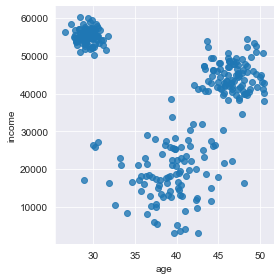

In [51]:
sns.lmplot(x='age', y='income', data=customers_df, fit_reg=False, size=4);

From Above, it can be observed that there are three customer segments, which can be described as  below:  
1. One on the top-left side of the graph, depicting low-age–high-income group.  
2. One on the top-right side of the graph, depicting high-age–medium-income group.  
3. One on the bottom of the graph, depicting a low-income group, which has an age spread from  low to high.

### **Finding Similarities Using Distances**
Clustering techniques assume that there are subsets in the data that are similar or homogeneous. One  approach for measuring similarity is through distances measured using different metrics. Few distance  measures used in clustering are discussed in the following sections.

### ***Euclidean Distance***
Euclidean distance is the radial distance between two observations or records. If there are many attributes (features), then the distance across all attributes is calculated to find out the distance. Euclidean  distance between two observations $X_1$ and $X_2$ with $n$ features can be calculated as
$$D(X_1, X_2) = \sqrt{\sum(X_{i1} - X_{i2})^2}$$
where $X_{i1}$ is the value of the $i^{th}$ feature for first observation and $X_{i2}$ is the value of $i^{th}$ feature for second  observation. For example, the distance between two customers, customer1 and customer2, is calculated  as follows:
$$\sqrt{(age_1 - age_2)^2 + (income_1 - income_2)^2}$$

### ***Other Distance Metrics***
*Some of the other widely used distances are as follows:*  
1. **Minkowski Distance:** It is the generalized distance measure between two observations.  
2. **Jaccard Similarity Coefficient:** It is a measure used when the data is qualitative, especially when  attributes can be represented in binary form.  
3. **Cosine Similarity:** In this, $X_1$ and $X_2$ are two n-dimensional vectors. It measures the angle  between two vectors (thus called as vector space model).  
4. **Gower’s Similarity Coefficient:** The distance and similarity measures that we have discussed so  far are valid either for quantitative data or qualitative data. *Gower’s similarity coefficient* can be used when both quantitative and qualitative features are present.

## **K-Means Clustering**
K-means clustering is one of the frequently used clustering algorithms. It is a non-hierarchical clustering method in which the number of clusters (K) is decided a priori. The observations in the sample are assigned to one of the clusters (say C1, C2, …, CK) based on the distance between the observation and the  centroid of the clusters.<br>
*The following steps are used in K-means clustering algorithm:*  
   1. Decide the value of K (which can be fine-tuned later).  
   2. Choose K observations from the data that are likely to be in different clusters. There are many  ways of choosing these initial K values; the easiest approach is to choose observations that are  farthest (in one of the parameters of the data).  
   3. The K observations selected in step 2 are the centroids of those clusters.  
   4. For remaining observations, find the cluster closest to the centroid. Add the new observation (say  observation j) to the cluster with the closest centroid. Adjust the centroid after adding a new observation to the cluster. The closest centroid is chosen based upon an appropriate distance measure.  
   5. Repeat step 4 until all observations are assigned to a cluster.

In [52]:
from sklearn.cluster import KMeans

clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [53]:
customers_df['clusterid'] = clusters.labels_

In [54]:
customers_df.head()

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


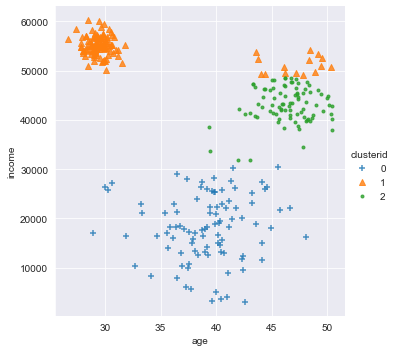

In [55]:
markers = ['+', '^', '.']
sns.lmplot(x = 'age', y='income',
           data = customers_df,
           hue = "clusterid",
           fit_reg = False,
           markers = markers,
           size = 5);

### ***Why we need to normalize the data?***
The above clusters are mostly segmented based on income. This is because the salary is on a larger scale  compared to the age. The scale of age is 0 to 60, while salary ranges from 0 to 50000. For example, difference in age between two customers, with age 20 and 70, is significant, but numerical difference is only  50. Similarly, difference in income between two customers, with income of 10000 and 11000, is not significant; the numerical difference is 1000.<br> 
So, the distance will always be determined by the difference in  salary and not in age.<br> 
***Hence before creating clusters, all features need to be normalized and brought to normalized scale.***<br> 
*StandardScaler in skleardn.preprocessing normalizes all values by subtracting all values  from its mean and dividing by standard deviation. Hence* 
$$X_{normalized} = \frac{X_i - \bar{X}}{\sigma_X}$$
where $\bar{X}$ is the mean & $\sigma_X$ is the corresponding Standard Deviation of $X$ feature.

In [56]:
# Normalizing Features
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

scaled_customers_df = scaler.fit_transform(customers_df[['age','income']])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [58]:
from sklearn.cluster import KMeans

clusters_new = KMeans(n_clusters=3, random_state=42)

clusters_new.fit(scaled_customers_df)

customers_df['clusterid_new'] = clusters_new.labels_

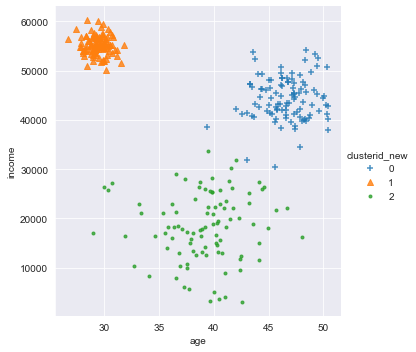

In [59]:
markers = ['+', '^', '.']
sns.lmplot(x = 'age', y='income',
           data = customers_df,
           hue = "clusterid_new",
           fit_reg = False,
           markers = markers,
           size = 5);

Now the clusters have been created properly. The cluster centers are given by *clusters.cluster_centers_*<br>
But these are standardized values. Hence, we can calculate the cluster centers from the original DataFrame using the information "which customers have been allocated to which segment".

In [60]:
clusters_new.cluster_centers_

array([[ 1.08753708,  0.29682871],
       [-1.20817959,  0.97471684],
       [ 0.09073855, -1.32005197]])

## **Cluster Centers and Interpreting the Clusters**
**Each cluster is defined by its cluster center. The cluster center explains the characteristic of the cluster  and helps us to interpret the cluster. For example, in this example of customer segmentation, the cluster  center provides the average age and average income of each cluster. Of course, the customer’s age and  income will vary from the cluster centers and is called the cluster variance.**

In [61]:
customers_df.groupby('clusterid_new')['age','income'].agg(['mean','std']).reset_index()

clusterid_new        age                  income             
                      mean       std          mean          std
0             0  46.627184  2.151559  44308.737864  4390.321503
1             1  29.384000  0.921458  55204.000000  1951.943864
2             2  39.140206  3.558665  18321.649485  6924.747691

**The clusters can be interpreted as follows:** 
   1. $cluster_0$: *Customers with mean age of 47 and income of 44.3k. High age and medium income.*  
   2. $cluster_1$: *Customers with mean age of 29 and income of 55.2K. Low age and high income.*
   3. $cluster_2$: *Customers with mean age of 39 and income of 18.3k. Mid age and low income.*  

## **Creating Product Segments Using Clustering**

*Using beer data*

In [63]:
beer_df = pd.read_csv(os.getcwd()+"/Data/beer.csv")
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [64]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])

### **How many Clusters Exist?**
As there are four features, it is not possible to plot and visualize them to understand how many clusters  may exist. For high-dimensional data, the following techniques can be used for discovering the possible  number of clusters:  
   1. Dendrogram  
   2. Elbow method
   
### ***Using Dendrogram***
A dendrogram is a cluster tree diagram which groups those entities together that are nearer to each other. A dendrogram can be drawn using the *clustermap()* method in *seaborn*.

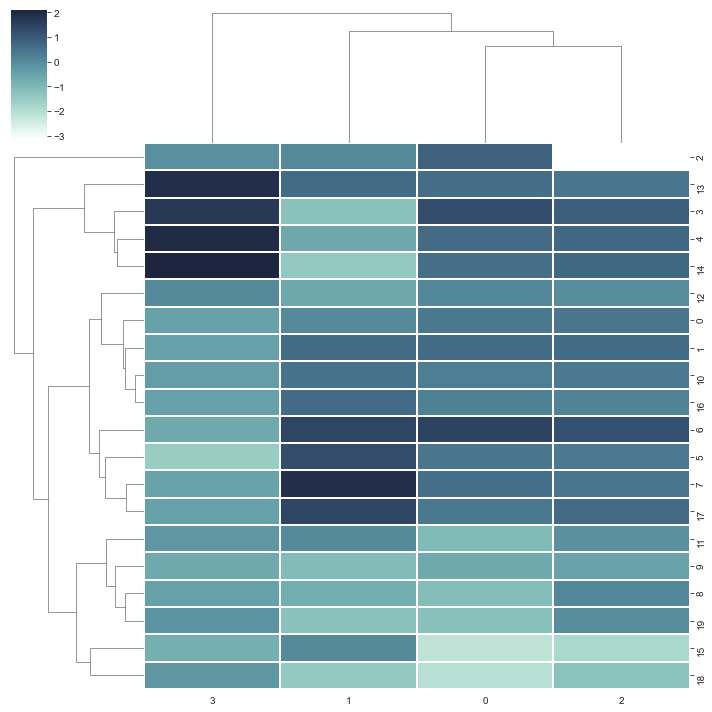

In [80]:
cmap = sns.cubehelix_palette(as_cmap=True, rot = -.3, light = 1)
sns.clustermap(scaled_beer_df, cmap=cmap, linewidths = .2, figsize=(10,10));

In [77]:
beer_df.loc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


**As shown above, dendrogram reorders the observations based on how close they are to each other  using distances (Euclidean). The tree on the left of the dendrogram depicts the relative distance between  nodes. For example, the distance between beer brand 10 and 16 is least. They seem to be very similar to  each other.**<br>**It can be observed that both the beer brands *Coors* and *Hamms* are very similar across all features.**

**Similarly, brands 2 and 18 seem to be most different as the distance is highest. They are represented on  two extremes of the dendrogram.**

In [78]:
beer_df.loc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


Brand Lowenbrau seems to have very low alcohol content. This can be an outlier or maybe a data error.  Thus, it can be dropped from the dataset.  

- ***The tree structure on the left of the dendrogram indicates that there may be four or five clusters in  the dataset.***

- **This is only a guideline or indication about the number of clusters, but the actual number of  clusters can be determined only after creating the clusters and interpreting them.**<br>***Creating more number  of clusters may give rise to the complexity of defining and managing them. It is always advisable to have  a less and reasonable number of clusters that make business sense.*** 

We will create four clusters and verify  if the clusters explain the product segments clearly and well.

#### ***How to find no. clusters using dendrogram?***<br> Link: https://youtu.be/ijUMKMC4f9I (See last part)

### ***Finding Optimal Number of Clusters Using Elbow Curve Method***

- ***If we assume all the products belong to only one segment, then the variance of the cluster will be highest. As we increase the number of clusters, the total variance of all clusters will start reducing. But the total variance will be zero if we assume each product is a cluster by itself.***

- ***So, Elbow curve method considers the percentage of variance explained as a function of the number of clusters. The optimal number  of clusters is chosen in such a way that adding another cluster does not change the variance explained significantly.*** 

- For a set of records $(X_1, X_2, \cdots, X_n)$, where each observation is a $d-dimensional$ real vector, K-means clustering algorithm segments the observations into $k$ $(≤ n)$ sets $S = \{S_1, S_2, \cdots, S_k\}$ to minimize the  **<u>within-cluster sum of squares (WCSS)</u>.** <br>**WCSS** *is the sum of distances of each point in the cluster to the  center of cluster across k clusters.<br>It is given by the following equation:*  
$$WCSS = {\text{arg min}}_{k}\sum_{S_i = 1}^{k}\sum_{X_i \in S_i}||X_i - \mu_i||^2$$
**where $\mu_i$ is the centroid of cluster $S_i$.**<br>

- ***If the percentage of variance explained by the clusters is plotted against the number of clusters, the initial increase in the number of clusters will add much information (and explain  a lot of variances), <u>but at some point, the marginal gain in explained variance will drop, giving an angle to the graph (similar to elbow). The number of clusters indicated at this angle can be chosen to be the most  appropriate number of clusters</u>; choosing the number of clusters in this approach is called **“<u>elbow criterion</u>”**.***  

    Let us create several cluster combinations ranging from one to ten and observe the WCSS in each  cluster and how marginal gain in explained variance starts to diminish gradually.<br> 
    **The *interia_* parameter in *KMeans* cluster algorithms provides the total variance for a particular number of clusters.**<br> 
    
The following code iterates and creates clusters ranging from 1 to 10 and captures the total variance  in the variable cluster_errors.

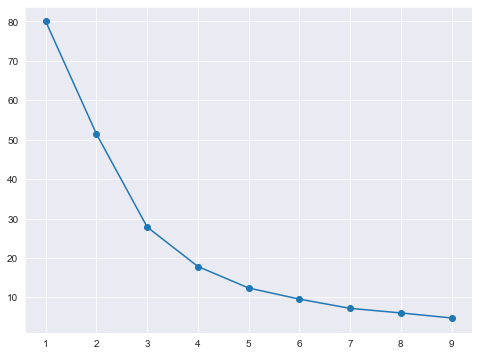

In [82]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)
    
plt.figure(figsize=(8,6))
plt.plot(cluster_range, cluster_errors, marker = "o");

**The plot above indicates that the elbow point is at 3, which in turn indicates there might be three clusters existing in the dataset.<br> As mentioned earlier, these techniques provide only guidance of how many clusters may exist in the dataset.**

In [83]:
# Normalizing the Features
scaler = StandardScaler()

scaled_beer_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])

In [84]:
# Creating Clusters
k = 3 # 3-Clusters

clusters = KMeans(k, random_state=42)
clusters.fit(scaled_beer_df)

beer_df['clusterID'] = clusters.labels_

#### **Interpreting the Clusters**

#### **Cluster 0:**

In [85]:
beer_df[beer_df.clusterID == 0]

,name,calories,sodium,alcohol,cost,clusterID
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


#### **In cluster 0, beers with medium alcohol content and cost are grouped together. This is the largest segment and may be targeting the largest segment of customers.**

#### **Cluster 1:**

In [86]:
beer_df[beer_df.clusterID == 1]

,name,calories,sodium,alcohol,cost,clusterID
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


#### **In cluster 1, all light beers with low calories and sodium content are clustered into one group. This must be addressing the customers who wants to drink but are also calorie consious.**

#### **Cluster 2:**

In [87]:
beer_df[beer_df.clusterID == 2]

,name,calories,sodium,alcohol,cost,clusterID
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


#### **These are expensive beers with relatively high alcohol content. Also the sodium content is low. The costs are high because the target customers could be brand sensitive and the brands are promoted as Premium Brands.**

# **HIERARCHIAL CLUSTERING**
Hierarchical clustering is a clustering algorithm which uses the following steps to develop clusters:  
   1. Start with each data point in a single cluster.  
   2. Find the data points with the shortest distance (using an appropriate distance measure) and  merge them to form a cluster.  
   3. Repeat step 2 until all data points are merged together to form a single cluster.
   
The above procedure is called an ***agglomerative hierarchical cluster.***<br> 

2 types of Hierarchial clustering - 
 - Agglomerative(Bottom-Up)
 - Divisive(Top-Down)
 
Link: https://youtu.be/ijUMKMC4f9I


*AgglomerativeClustering* in *sklearn.cluster* provides an algorithm for hierarchical clustering and also takes the number of clusters to be created as an argument.

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
beer_df['h_clusterID'] = h_clusters.labels_

In [90]:
beer_df[beer_df.h_clusterID == 0]

,name,calories,sodium,alcohol,cost,clusterID,h_clusterID
2,Lowenbrau,157,15,0.9,0.48,1,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [91]:
beer_df[beer_df.h_clusterID == 1]

,name,calories,sodium,alcohol,cost,clusterID,h_clusterID
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [92]:
beer_df[beer_df.h_clusterID == 2]

,name,calories,sodium,alcohol,cost,clusterID,h_clusterID
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


#### **Both Clustering Algorithms(KMeans & Hierarchial) have created similar clusters. Only cluster ids have changed.**

## **Conclusion:**
1. ***Clustering is an unsupervised learning algorithm that divides the dataset into mutually exclusive and exhaustive subsets (in non-overlapping clusters) that are homogeneous within the group and  heterogeneous between the groups.***

2. ***Several distance and similarity measures such as Euclidian distance, Cosine similarity are used in clustering algorithms. Similarity coefficients such as Jaccard coefficient are used for qualitative data,  whereas Gower’s similarity is used for mixed data i.e. numerical and categorical data.***  

3. ***K-means clustering and hierarchical clustering are two popular techniques used for clustering.***  

4. ***One of the decisions to be taken during clustering is to decide on the number of clusters. Usually,  this is carried out using elbow curve. The cluster number at which the elbow (bend) occurs in the  elbow curve is the optimal number of clusters.***